### Experimenting with PCA

In [402]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import exifread
import glob, os
import shutil
from sklearn import decomposition
import sklearn 
from scipy import stats

In [174]:
files = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/*.JPG")
numneg=len(files)
print numneg
files = files+glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/*.JPG")
num=len(files)
print num
filepos = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/*.JPG")
numpos=len(filepos)
print files[-1*numpos:-1][0]

7224
7316
/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/SM-1_20141205 (6801).JPG


In [139]:
dates=np.array([])
lat=np.array([])
lon=np.array([])
flash=np.array([])
lightsource=np.array([])
colorspace=np.array([])
# Open image file for reading (binary mode)
for i in range(num): 
    f = open(files[i], 'rb')
    tags = exifread.process_file(f)
    dates=np.append(dates,str(tags['EXIF DateTimeOriginal']).split()[0])
    lat= np.append(lat,str(tags['GPS GPSLatitude']))
    lon= np.append(lon,str(tags['GPS GPSLongitude']))
    flash=np.append(flash,str(tags['EXIF Flash']))
    lightsource=np.append(lightsource,str(tags['EXIF LightSource']))
    colorspace=np.append(colorspace,str(tags['EXIF ColorSpace']))

In [140]:
datepos=np.array([])
latpos=np.array([])
lonpos=np.array([])
flashpos=np.array([])
lightsourcepos=np.array([])
colorspacepos=np.array([])
# Open image file for reading (binary mode)
for i in range(numpos): 
    f = open(filepos[i], 'rb')
    tagpos = exifread.process_file(f)
    datepos=np.append(datepos,str(tagpos['EXIF DateTimeOriginal']).split()[0])
    latpos= np.append(latpos,str(tagpos['GPS GPSLatitude']))
    lonpos= np.append(lonpos,str(tagpos['GPS GPSLongitude']))
    flashpos=np.append(flashpos,str(tagpos['EXIF Flash']))
    lightsourcepos=np.append(lightsourcepos,str(tagpos['EXIF LightSource']))
    colorspacepos=np.append(colorspacepos,str(tagpos['EXIF ColorSpace']))

In [141]:
uni_lightsource =np.unique(lightsource)
uni_colorspace =np.unique(colorspace)
uni_flash =np.unique(flash)
uni_lon =np.unique(lon)
uni_lat =np.unique(lat)

uni_lightsourcepos =np.unique(lightsourcepos)
uni_colorspacepos =np.unique(colorspacepos)
uni_flashpos =np.unique(flashpos)
uni_lonpos =np.unique(lonpos)
uni_latpos =np.unique(latpos)
uni_latpos

array(['[37, 31, 35]'], 
      dtype='|S32')

In [142]:
uniquedate =np.unique(dates)
print uniquedate
num_unique=np.zeros(len(uniquedate))
for i in range(len(uniquedate)):
    num_unique[i]=len(np.where(dates== uniquedate[i])[0])
num_unique

['2014:11:12' '2014:11:14' '2014:11:15' '2014:11:16' '2014:11:17'
 '2014:11:18' '2014:11:20' '2014:11:21' '2014:11:22' '2014:11:23'
 '2014:11:24' '2014:11:25' '2014:11:26' '2014:11:27' '2014:11:28'
 '2014:11:30' '2014:12:01' '2014:12:05' '2014:12:06' '2014:12:11'
 '2014:12:13' '2014:12:14' '2014:12:15' '2014:12:16' '2014:12:26']


array([  7.92000000e+02,   5.00000000e+00,   3.84000000e+02,
         1.50000000e+02,   7.17000000e+02,   1.19000000e+02,
         6.00000000e+00,   2.40000000e+01,   1.80000000e+01,
         1.14000000e+02,   3.90000000e+02,   3.84000000e+02,
         1.32000000e+02,   5.70000000e+01,   4.23000000e+02,
         6.00000000e+00,   1.50000000e+01,   9.00000000e+00,
         3.00000000e+00,   9.00000000e+00,   8.10000000e+01,
         3.21300000e+03,   1.86000000e+02,   7.80000000e+01,
         1.00000000e+00])

In [143]:
uniquedatepos =np.unique(datepos)
num_uniquepos=np.zeros(len(uniquedatepos))
for i in range(len(uniquedatepos)):
    num_uniquepos[i]=len(np.where(datepos== uniquedatepos[i])[0])
num_uniquepos

array([  1.,   3.,   6.,   3.,   9.,  14.,   3.,  24.,  12.,   1.,   3.,
         6.,   7.])

estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng),
     True),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),

    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=2),
     True),
]

In [278]:
os.path.isdir(name)

True

In [319]:
index=0
id0=np.where(dates== uniquedate[index])
print dates[id0][0]
dir='/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/PCA/'
name=dir+dates[id0][0]
if os.path.isdir(name):
    shutil.rmtree(name)
if os.path.isdir(dir)== False:
    os.mkdir(dir)    
os.mkdir(name)
lenad=len('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/')
sx=1840
sy=2592
dx=sx/5
dy=sy/5
imcube=np.empty([368, 518])
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for i in range(len(id0[0])):
    im=cv2.imread(files[id0[0][i]])
    im[1744:1944,0:209,:]=0
    im=im[0:1840,:,:]
    #im[1840:1944,:,:]=0
    img=cv2.resize(im, (dy, dx),interpolation=cv2.INTER_NEAREST)
    imresized=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #imresized = clahe.apply(imresized)
    imcube=np.dstack((imcube,imresized))
imcube=np.delete(imcube,0,2)

2014:11:12


In [320]:
len(id0[0])

792

In [321]:

print uniquedate
print uniquedatepos

['2014:11:12' '2014:11:14' '2014:11:15' '2014:11:16' '2014:11:17'
 '2014:11:18' '2014:11:20' '2014:11:21' '2014:11:22' '2014:11:23'
 '2014:11:24' '2014:11:25' '2014:11:26' '2014:11:27' '2014:11:28'
 '2014:11:30' '2014:12:01' '2014:12:05' '2014:12:06' '2014:12:11'
 '2014:12:13' '2014:12:14' '2014:12:15' '2014:12:16' '2014:12:26']
['2014:11:14' '2014:11:17' '2014:11:20' '2014:11:21' '2014:11:23'
 '2014:11:24' '2014:11:25' '2014:11:26' '2014:11:27' '2014:11:28'
 '2014:11:30' '2014:12:01' '2014:12:05']


In [322]:
#Calculating the mean image
nx,ny,nz=np.shape(imcube)
immean=np.mean(imcube,axis=2)
imcube_center=np.zeros([nx*ny,nz])
np.shape(imcube)
for i in range(len(id0[0])):
    imcube_center[:,i]=(imcube[:,:,i]-immean).flatten()

In [323]:
imblur=np.empty([368,518])
for i in range(len(id0[0])):
    imblur=np.dstack((imblur,cv2.blur(imcube[:,:,i],(5,5))))
imblur=np.delete(imblur,0,2)

In [324]:
#Calculating the mean blur image
nx,ny,nz=np.shape(imblur)
blurmean=np.mean(imblur,axis=2)
imblur_center=np.zeros([nx*ny,nz])
np.shape(imblur)
for i in range(len(id0[0])):
    imblur_center[:,i]=(imblur[:,:,i]-blurmean).flatten()

In [325]:
n_components=10
estimator=decomposition.PCA(n_components=n_components, svd_solver='randomized',whiten=True)
estimator.fit(imblur_center.T)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [326]:
n_components=10
estimator=decomposition.PCA(n_components=n_components, svd_solver='randomized',whiten=True)
estimator.fit(imcube_center.T)
'''train_time = (time() - t0)
print("done in %0.3fs" % train_time)
if hasattr(estimator, 'cluster_centers_'):
    components_ = estimator.cluster_centers_
else:
    components_ = estimator.components_
'''

'train_time = (time() - t0)\nprint("done in %0.3fs" % train_time)\nif hasattr(estimator, \'cluster_centers_\'):\n    components_ = estimator.cluster_centers_\nelse:\n    components_ = estimator.components_\n'

In [327]:
data_transformed=estimator.fit_transform(imcube_center.T)

In [328]:
print np.shape(data_transformed)
data_inverse=estimator.inverse_transform(data_transformed)


(792, 10)


In [329]:
blur_transformed=estimator.fit_transform(imblur_center.T)
blur_inverse=estimator.inverse_transform(blur_transformed)


In [292]:
np.shape(data_inverse)
invim=data_inverse[100,:].reshape(368, 518)+immean
np.mean(invim)
invblur=blur_inverse[100,:].reshape(368, 518)+blurmean


/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (2995).JPG


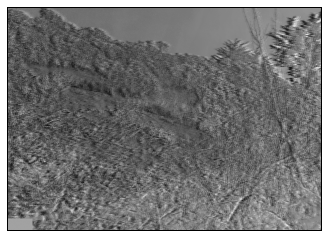

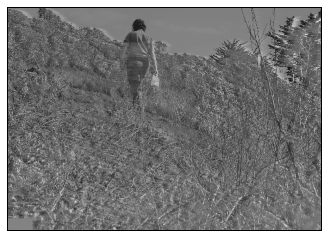

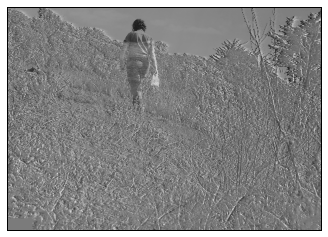

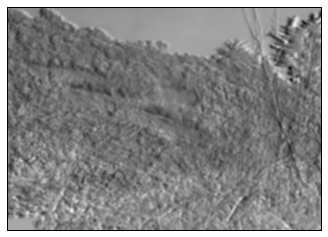

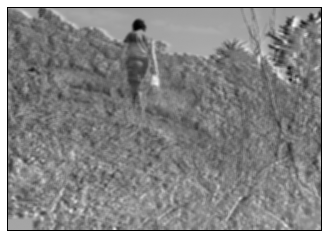

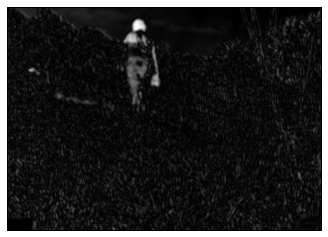

In [363]:
ind=45
print files[id0[0][ind]]
np.shape(data_inverse)
invim=data_inverse[ind,:].reshape(368, 518)
plt.xticks([]), plt.yticks([])
plt.imshow(invim,cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(imcube_center[:,ind].reshape(368, 518),cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(imcube_center[:,ind].reshape(368, 518)-invim,cmap='gray',interpolation = 'bicubic')
plt.show()

invblur=blur_inverse[ind,:].reshape(368, 518)
plt.xticks([]), plt.yticks([])
plt.imshow(invblur,cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(imblur_center[:,ind].reshape(368, 518),cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(np.fabs(imblur_center[:,ind].reshape(368, 518)-invblur),cmap='gray',interpolation = 'bicubic')
plt.show()

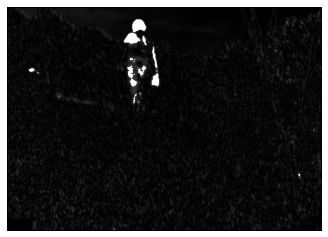

(2, 189944)

In [384]:
absim=np.fabs(imblur_center[:,ind].reshape(368, 518)-invblur)
x0,y0=np.where(absim > 0)
np.shape(nonzero)
mean=np.mean(absim[x0,y0])
std=np.mean(absim[x0, y0])
idx, idy =np.where(absim > mean+5*std)
absim[idx,idy]=255
plt.xticks([]), plt.yticks([])
plt.imshow(absim,cmap='gray',interpolation = 'bicubic')
plt.show()
np.shape(nonzero)


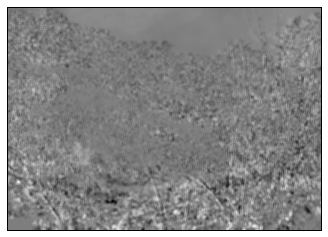

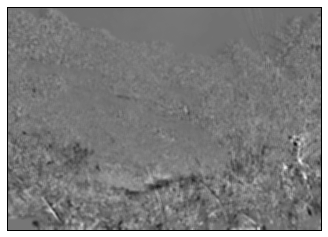

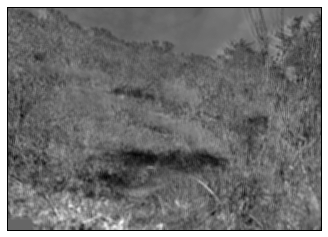

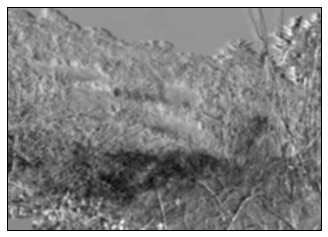

In [331]:
ind=619
invblur=blur_inverse[ind,:].reshape(368, 518)
plt.xticks([]), plt.yticks([])
plt.imshow(imblur_center[:,ind].reshape(368, 518)-invblur,cmap='gray',interpolation = 'bicubic')
plt.show()

ind=720
invblur=blur_inverse[ind,:].reshape(368, 518)
plt.xticks([]), plt.yticks([])
plt.imshow(imblur_center[:,ind].reshape(368, 518)-invblur,cmap='gray',interpolation = 'bicubic')
plt.show()

ind=791
invblur=blur_inverse[ind,:].reshape(368, 518)
plt.xticks([]), plt.yticks([])
plt.imshow(imblur_center[:,ind].reshape(368, 518)-invblur,cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(imblur_center[:,ind].reshape(368, 518),cmap='gray',interpolation = 'bicubic')
plt.show()

In [332]:
print name+'/'+files[id0[0][ind]][lenad:-4]
print name+'/'+files[id0[0][ind]][lenad:lenad+1]+'_'+files[id0[0][i]][lenad+10:-4]
print np.std(imblur_center[:,45].reshape(368, 518)-blur_inverse[45,:].reshape(368, 518))
print np.std(imblur_center[:,620].reshape(368, 518)-blur_inverse[620,:].reshape(368, 518))
print np.std(imblur_center[:,720].reshape(368, 518)-blur_inverse[720,:].reshape(368, 518))
'''16.8633551564
7.82273228694
9.78465090745
'''

/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/PCA/2014:11:12/Negatives/SM-1_20141226 (3741)
/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/PCA/2014:11:12/N_SM-1_20141226 (3741)
14.2639940723
6.73175610842
7.80790587014


'16.8633551564\n7.82273228694\n9.78465090745\n'

In [362]:
imres=imblur_center[:,i].reshape(368, 518)-invblur
print np.min(imres)
imres=imres+np.fabs(np.min(imres))
print np.min(imres)
print np.max(imres)
imres=255*imres/np.max(imres)
print np.std(imres)


-55.2439621648
0.0
137.906466105
22.412285113


In [333]:
### calculating the similarity between the PCA inverse transformed image and the original image.
stdpca=[]
meanpca=[]
for i in range(len(id0[0])):
    invim=data_inverse[i,:].reshape(368, 518)
    stdpca=np.append(stdpca,np.std(imcube_center[:,i].reshape(368, 518)-invim))
    meanpca=np.append(meanpca,np.mean(imcube_center[:,i].reshape(368, 518)-invim))

In [334]:
### calculating the similarity between the PCA blured inverse transformed image and the original image.
stdpcablur=[]
medianpcablur=[]

for i in range(len(id0[0])):
    invblur=blur_inverse[i,:].reshape(368, 518)
    stdpcablur=np.append(stdpcablur,np.std(imblur_center[:,i].reshape(368, 518)-invblur))
    medianpcablur=np.append(medianpcablur,np.mean(imblur_center[:,i].reshape(368, 518)-invblur))

In [335]:
imlistblur= np.array(files)[id0[0]]
print imlistblur[45]
print stdpcablur[45]/np.max(stdpcablur)

/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (2995).JPG
0.353588265756


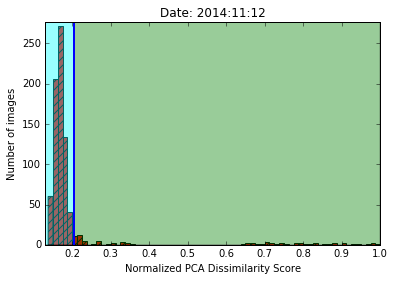

In [431]:

minstdblur=np.min(stdpcablur)
maxstdblur=np.max(stdpcablur)

n, bins, patches=plt.hist(stdpcablur/maxstdblur,bins=np.linspace(minstdblur/maxstdblur,1,70),facecolor='red', hatch='///',alpha=1.0,label=' Lon:'+lon[id0][0][1:-1]+'\n Lat:'+lat[id0][0][1:-1]+'\n Daylight')

minmedianblur=np.min(medianpcablur)
medianmaxblur=np.max(medianpcablur)
#plt.hist(meanpcablur/meanmaxblur,bins=np.linspace(minmeanblur/meanmaxblur,1,40))


stdpcablur_med=np.median(stdpcablur/maxstdblur)
stdpcablur_16=np.percentile(stdpcablur/maxstdblur,16)
sigma=stdpcablur_med-stdpcablur_16
newthr=stdpcablur_med+3*sigma

#plt.plot([newthr,newthr],[0,200],linewidth=3)

plt.axis([0.13, 1, 0, np.max(n)+5])
#plt.grid(True)
plt.xlabel('Normalized PCA Dissimilarity Score')
plt.ylabel('Number of images')
plt.title('Date: '+dates[id0][0])
plt.plot([newthr,newthr],[0,np.max(n)+5],linewidth=2,color='blue',label=r'3\sigma')

#plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
#plt.plot([thres,thres],[0,200],color='blue')
right=np.ones(np.max(n)+5)-0.5
plt.hist(right,bins=np.linspace(newthr,1,2),facecolor='green', alpha=0.4)
left=np.ones(np.max(n)+5)-0.8
plt.hist(left,bins=np.linspace(0,newthr,2),facecolor='cyan', alpha=0.4)
plotname=name+'/'+'PCA-Dissimilarity-'+name[-10:]+'.png'
plt.savefig(plotname)


In [401]:
for i in range(len(out3sigma[0])):
    newname=name+'/'+imlistblur[out3sigma[0][i]][lenad:lenad+1]+'_'+imlistblur[out3sigma[0][i]][lenad+10:-4]
    invblur=blur_inverse[i,:].reshape(368, 518)
    #cv2.imwrite(newname+'_PCA_InvTransformed.JPG',invblur+blurmean)
    #cv2.imwrite(newname+'_PCA_MeanSubOrg.JPG',imblur_center[:,i].reshape(368, 518)+blurmean)
    imres=imblur_center[:,i].reshape(368, 518)-invblur
    imres=imres+np.fabs(np.min(imres))
    imres=255*imres/np.max(imres)
    cv2.imwrite(newname+'_PCA_Residual.JPG',imres)

In [399]:
out3sigma=np.where(stdpcablur/maxstdblur >= newthr)
print out3sigma[0]
print imlistblur[out3sigma[0][0]]
newname=name+'/'+'Outliers-'+name[-10:]+'.txt'
cand=open(newname,'w')
for i in imlistblur[out3sigma[0]]:
    cand.write(i+'\n')
cand.close()


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56 247 248 311 363 365 483 484 759 760 761 768 769 770 786 787
 788 789 790 791]
/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (2950).JPG


0.512963920802
[ '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (2953).JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (2954).JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (2970).JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (2977).JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (3451).JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (3452).JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (3453).JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (3454).JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (3455).JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/SM-1_20141226 (3456)

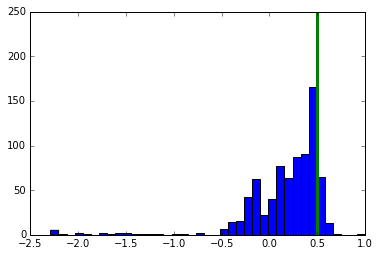

In [258]:
minstd=np.min(stdpca)
maxstd=np.max(stdpca)
#plt.hist(stdpca/maxstd,bins=np.linspace(minstd/maxstd,1,40))
minmean=np.min(meanpca)
meanmax=np.max(meanpca)
plt.hist(meanpca/meanmax,bins=np.linspace(minmean/meanmax,1,40))

thresmean=np.percentile(meanpca/meanmax,90)
thres=np.percentile(stdpca/maxstd,90)
print thres
plt.plot([thresmean,thresmean],[0,250],linewidth=3)
outlier=np.where(stdpca/maxstd >= thres)
outmean=np.where(meanpca/meanmax >= thresmean)

imlist= np.array(files)[id0[0]]
print imlist[outmean[0]]

In [87]:
if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
else:
        components_ = estimator.components_

In [88]:
n_col=3
n_row=2
def plot_gallery(images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

for i in range(len(id0[0])):
    cv2.imwrite(name+'/'+files[id0[0][i]][lenad:-4]+'_PCA.JPG',impca)

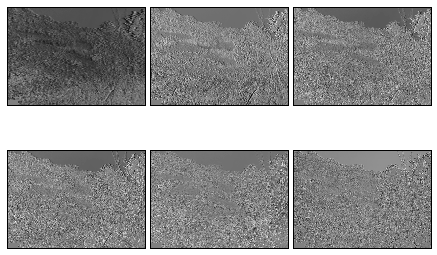

In [89]:
image_shape = (368, 518)
if (hasattr(estimator, 'noise_variance_') and estimator.noise_variance_.shape != ()):
    plot_gallery("Pixelwise variance", estimator.noise_variance_.reshape(1, -1), n_col=1,n_row=1)
plot_gallery(components_[:n_components])

plt.show()

In [90]:
np.shape(components_)

(6, 190624)

In [94]:
print estimator

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)
